In [59]:
from visual_behavior.encoder_processing import running_data_smoothing as rds
import visual_behavior.database as db
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [117]:
session_id = 854524023

In [118]:
experiment_id = db.lims_query('select id from ophys_experiments where ophys_session_id = {}'.format(session_id))
experiment_id

854703305

In [119]:
pkl_path = db.get_pkl_path(session_id, id_type = 'ophys_session_id')

In [121]:
running_data_df = rds.load_running_df(pkl_path=pkl_path)
running_data_df['timestamps'] = running_data_df['time']
t0 = 120
t_interval=10

dft = running_data_df.query('timestamps >= @t0-@t_interval and timestamps <= @t0+@t_interval')

In [122]:
dft

,time,frame,speed,dx,v_sig,v_in,timestamps
6590,110.007915,6590,64.225254,12.364980,3.657733,4.976894,110.007915
6591,110.024597,6591,64.220748,11.153335,3.821821,4.989814,110.024597
6592,110.041278,6592,61.093607,5.292857,3.894174,4.988522,110.041278
6593,110.057956,6593,57.962509,12.484079,4.060846,4.980770,110.057956
6594,110.074638,6594,59.612477,10.065395,4.205553,4.987230,110.074638
...,...,...,...,...,...,...,...
7784,129.924544,7784,0.091878,0.824080,4.824434,4.983354,129.924544
7785,129.941214,7785,-0.437432,0.174949,4.821850,4.978186,129.941214
7786,129.957882,7786,-0.966381,-0.741216,4.814098,4.980770,129.957882
7787,129.974563,7787,-1.285591,-0.167760,4.819266,4.988522,129.974563


In [140]:
time_column='time'
v_max='v_in'
filter_cutoff_frequency=10
remove_outliers_at_wraps=True
zscore_thresold= np.inf #5

running_data_df = rds.add_speed(
        running_data_df,
        column_label='raw',
        v_max=v_max,
        remove_outliers_at_wraps=remove_outliers_at_wraps,
        zscore_thresold=zscore_thresold
    )

filtered_speed = rds.apply_lowpass_filter(
        running_data_df,
        column_to_filter='speed_raw',
        cutoff_frequency=filter_cutoff_frequency,
        time_column=time_column,
    )
running_data_df['speed'] = filtered_speed
running_data_df['acceleration'] = rds.calculate_derivative(running_data_df, 'speed', time_column=time_column)
running_data_df['jerk'] = rds.calculate_derivative(running_data_df, 'acceleration', time_column=time_column)

<IPython.core.display.Javascript object>


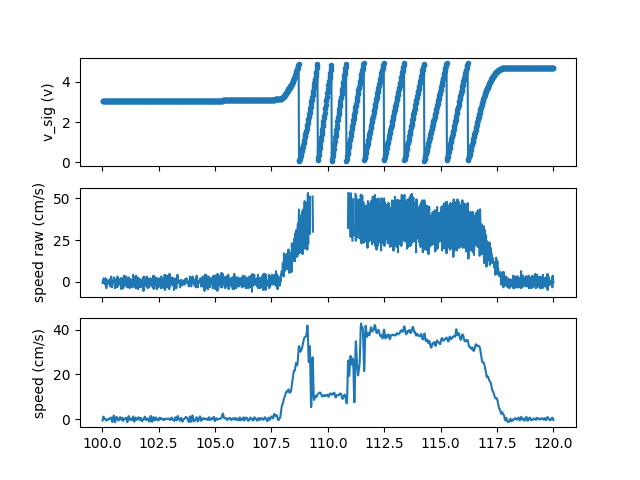

Text(0, 0.5, 'speed (cm/s)')

In [135]:
t0 = 110
t_interval=10

dft = running_data_df #.query('timestamps >= @t0-@t_interval and timestamps <= @t0+@t_interval')

fig,ax = plt.subplots(3,1,sharex=True)
ax[0].plot(
    dft['timestamps'],
    dft['v_sig'],
    marker='.'
)

ax[1].plot(
    dft['timestamps'],
    dft['speed_raw']
)

ax[2].plot(
    dft['timestamps'],
    dft['speed']
)

ax[0].set_ylabel('v_sig (v)')
ax[1].set_ylabel('speed raw (cm/s)')
ax[2].set_ylabel('speed (cm/s)')

In [138]:
t0 = 110
t_interval=0.2

dft = running_data_df.query('timestamps >= @t0-@t_interval and timestamps <= @t0+@t_interval')
dft['zscored_speed_raw'].max()

6.87951401819888

In [139]:
running_data_df['zscored_speed_raw'].max()

8.004883256624959

In [86]:
t_interval=0.1
cols = [
    'frame',
    'speed',
    'zscored_speed_raw'
]
dft = running_data_df.query('timestamps >= @t0-@t_interval and timestamps <= @t0+@t_interval')
dft

,time,frame,speed,dx,v_sig,v_in,timestamps,v_sig_last,wrap_ID,v_sig_diff,v_sig_unwrapped,speed_raw,wrap_bool,speed_raw_pre_wrap_correction,zscored_speed_raw
222313,3708.311140,222313,0.000000,0.000000,2.659347,4.984845,3708.311140,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222314,3708.327791,222314,0.000000,0.000000,2.659347,4.984845,3708.327791,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222315,3708.344500,222315,0.000000,0.000000,2.659347,4.984845,3708.344500,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222316,3708.361180,222316,0.000000,0.000000,2.659347,4.984845,3708.361180,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222317,3708.377838,222317,0.000000,0.000000,2.659347,4.984845,3708.377838,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222318,3708.394537,222318,0.000000,0.000000,2.659347,4.984845,3708.394537,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222319,3708.411221,222319,2.743757,0.000000,2.659347,4.984845,3708.411221,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222320,3708.427869,222320,8.092482,70.214310,3.633472,4.987429,3708.427869,2.659347,0,0.974125,452.646786,405.673266,False,410.135407,97.853884
222321,3708.444583,222321,10.929537,1.964317,3.664479,4.992597,3708.444583,3.633472,0,0.031007,452.677793,12.848057,False,13.002837,2.854335
222322,3708.461264,222322,10.950120,0.951130,3.674814,4.988721,3708.461264,3.664479,0,0.010336,452.688128,4.294733,False,4.343097,0.785827


In [83]:
t_interval=0.1
cols = [
    'frame',
    'speed',
    'zscored_speed_raw'
]
dft = running_data_df.query('timestamps >= @t0-@t_interval and timestamps <= @t0+@t_interval')
dft

,time,frame,speed,dx,v_sig,v_in,timestamps,v_sig_last,wrap_ID,v_sig_diff,v_sig_unwrapped,speed_raw,wrap_bool,speed_raw_pre_wrap_correction,zscored_speed_raw
222313,3708.311140,222313,0.000000,0.000000,2.659347,4.984845,3708.311140,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222314,3708.327791,222314,0.000000,0.000000,2.659347,4.984845,3708.327791,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222315,3708.344500,222315,0.000000,0.000000,2.659347,4.984845,3708.344500,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222316,3708.361180,222316,0.000000,0.000000,2.659347,4.984845,3708.361180,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222317,3708.377838,222317,0.000000,0.000000,2.659347,4.984845,3708.377838,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222318,3708.394537,222318,0.000000,0.000000,2.659347,4.984845,3708.394537,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222319,3708.411221,222319,2.743757,0.000000,2.659347,4.984845,3708.411221,2.659347,0,0.000000,451.672661,0.000000,False,0.000000,-0.252797
222320,3708.427869,222320,8.092482,70.214310,3.633472,4.987429,3708.427869,2.659347,0,0.974125,452.646786,NaN,False,410.135407,97.853884
222321,3708.444583,222321,10.929537,1.964317,3.664479,4.992597,3708.444583,3.633472,0,0.031007,452.677793,12.848057,False,13.002837,2.854335
222322,3708.461264,222322,10.950120,0.951130,3.674814,4.988721,3708.461264,3.664479,0,0.010336,452.688128,4.294733,False,4.343097,0.785827


In [109]:
from visual_behavior.data_access import loading

In [112]:
session = loading.get_ophys_dataset(875564420, sdk_only=True)

In [113]:
session.running_data_df

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:367: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  "value removed\n", UserWarning, stacklevel=1)
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:15: RuntimeWarning: Mean of empty slice
  dxdt = np.nanmean(dxdt, axis=0)


,speed,dx,v_sig,v_in
timestamps,,,,
9.547086,-0.000237,0.000000,0.705928,4.990013
9.563726,2.346867,0.945491,0.718848,4.988721
9.580456,4.320896,1.557240,0.740811,4.991305
9.597126,5.392682,1.002267,0.753730,4.984845
9.613766,5.221474,1.126537,0.770526,4.992597
...,...,...,...,...
4512.373236,-0.308132,0.363183,1.842839,4.987429
4512.389956,-0.500575,-0.034448,1.842839,4.988721
4512.406636,-0.069495,0.068914,1.842839,4.986137


<IPython.core.display.Javascript object>


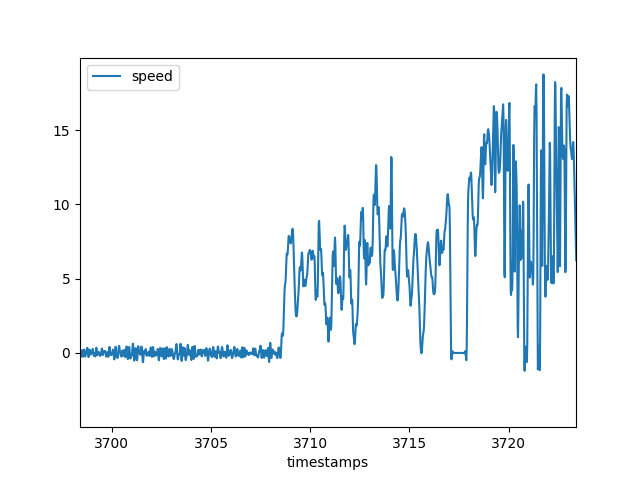

(3698.4, 3723.4)

In [116]:
fig,ax=plt.subplots()
session.running_data_df.plot(y='speed', ax=ax)
ax.set_xlim(t0-10, t0+15)